<a href="https://colab.research.google.com/github/A5HU705H/IITISoC-22-AI-ML-12-Song-Recommendation/blob/main/Copy_of_Project_tentative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transporting the Dataset to Google colab from FER-2013 Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

Importing the Libraries

In [3]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Importing the Dataset

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('/content/train',target_size=(48,48),color_mode='grayscale',class_mode='categorical',batch_size=64)

Found 28709 images belonging to 7 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('/content/test',target_size=(48,48),color_mode='grayscale',class_mode='categorical',batch_size=64)

Found 7178 images belonging to 7 classes.


Building the Convolutional Neural Network(CNN)

In [7]:
from keras.layers import BatchNormalization
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(BatchNormalization())


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(BatchNormalization())

model.add(tf.keras.layers.Dense(7, activation='softmax'))

Training the CNN

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay= 1e-6)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.fit(x=training_set,validation_data=test_set,epochs=50)

Epoch 1/50
449/449 [==============================] - 28s 34ms/step - loss: 2.3081 - accuracy: 0.2278 - val_loss: 1.8895 - val_accuracy: 0.3130
Epoch 2/50
449/449 [==============================] - 13s 29ms/step - loss: 1.9718 - accuracy: 0.3222 - val_loss: 1.6101 - val_accuracy: 0.3823
Epoch 3/50
449/449 [==============================] - 13s 28ms/step - loss: 1.7615 - accuracy: 0.3797 - val_loss: 1.4244 - val_accuracy: 0.4646
Epoch 4/50
449/449 [==============================] - 13s 28ms/step - loss: 1.6358 - accuracy: 0.4090 - val_loss: 1.3556 - val_accuracy: 0.4791
Epoch 5/50
449/449 [==============================] - 13s 28ms/step - loss: 1.5335 - accuracy: 0.4395 - val_loss: 1.3603 - val_accuracy: 0.4866
Epoch 6/50
449/449 [==============================] - 13s 28ms/step - loss: 1.4588 - accuracy: 0.4593 - val_loss: 1.3006 - val_accuracy: 0.5132
Epoch 7/50
449/449 [==============================] - 13s 28ms/step - loss: 1.3865 - accuracy: 0.4876 - val_loss: 1.3044 - val_accuracy:

Taking the Webcam Input

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


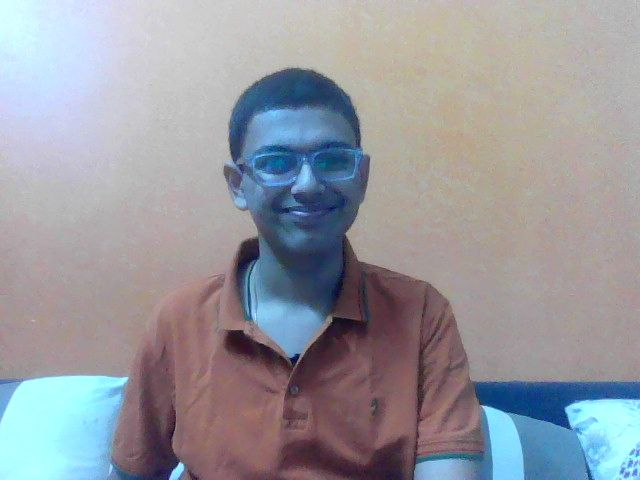

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Using the Webcam Input to Predict the Emotion

In [ ]:
webcam_img=tf.keras.utils.load_img('/content/photo.jpg',target_size=(48,48),color_mode='grayscale')
webcam_img=tf.keras.utils.img_to_array(webcam_img)
webcam_img=np.expand_dims(webcam_img,axis=0)
result=model.predict(webcam_img)

In [ ]:
max=0
maxpos=0
for i in range(7):
  if(result[0][i]>max):
    max=result[0][i]
    maxpos=i
if(maxpos==0):
  prediction='anger'
elif(maxpos==1):
  prediction='disgust'
elif(maxpos==2):
  prediction='fear'
elif(maxpos==3):
  prediction='happiness'
elif(maxpos==4):
  prediction='neutral'
elif(maxpos==5):
  prediction='sadness'
else:
  prediction='surprise'
print("The Emotion detected is:",prediction)          

The Emotion detected is: happiness


Song Recommendation based on Emotion Detected

In [ ]:
happy_songs=[['Sunshine','OneRepublic'],
             ["Overpass Graffiti","Ed Sheeran"],
             ['Brave','Ella Henderson']]
sad_songs=[['Someone Like You','Adele'],
           ['Stay With Me','Sam Smith'],
           ['Hallelujah','Demi Lovato']]
angry_songs=[['In The End','Linkin Park'],
             ['The Way I am','Eminem'],
             ['Bodies','Drowining Pool']]
fear_songs=[['Im Not Afraid','Eminem'],
            ['Overcomer','Mandisa'],
            ['Hero','Mariah Carey']]
disgust_songs=[['Cold Shoulder','Adele'],
               ['Reject','Green Day'],
               ['Really Dont Care','Demi Lovato']]
neutral_songs=[['Run','OneRepublic'],
               ['Dont Stop me now','Queen'],
               ['I want it that way','Backstreet Boys']]
surprise_songs=[['This Ones for you','David Guetta'],
                ['Cant Stop the Feeling','Justin Timberlake'],
                ['Hymn for the Weekend','Coldplay']]
print('Recommended Songs:')
if(prediction=='happiness'):
  print(happy_songs[0][0],'By',happy_songs[0][1])
  print(happy_songs[1][0],'By',happy_songs[1][1])
  print(happy_songs[2][0],'By',happy_songs[2][1])
elif(prediction=='sadness'):
  print(sad_songs[0][0],'By',sad_songs[0][1])
  print(sad_songs[1][0],'By',sad_songs[1][1])
  print(sad_songs[2][0],'By',sad_songs[2][1])
elif(prediction=='anger'):
  print(angry_songs[0][0],'By',angry_songs[0][1])    
  print(angry_songs[1][0],'By',angry_songs[1][1])
  print(angry_songs[2][0],'By',angry_songs[2][1])
elif(prediction=='neutral'):
  print(neutral_songs[0][0],'By',neutral_songs[0][1])  
  print(neutral_songs[1][0],'By',neutral_songs[1][1])
  print(neutral_songs[2][0],'By',neutral_songs[2][1])
elif(prediction=='disgust'):
  print(disgust_songs[0][0],'By',disgust_songs[0][1])
  print(disgust_songs[1][0],'By',disgust_songs[1][1])
  print(disgust_songs[2][0],'By',disgust_songs[2][1])
elif(prediction=='fear'):
  print(fear_songs[0][0],'By',fear_songs[0][1]) 
  print(fear_songs[1][0],'By',fear_songs[1][1])
  print(fear_songs[2][0],'By',fear_songs[2][1]) 
else:
  print(surprise_songs[0][0],'By',surprise_songs[0][1])
  print(surprise_songs[1][0],'By',surprise_songs[1][1])
  print(surprise_songs[2][0],'By',surprise_songs[2][1]) 

Recommended Songs:
Sunshine By OneRepublic
Overpass Graffiti By Ed Sheeran
Brave By Ella Henderson
